In [1]:
# import the required libraries
from google.colab import drive
drive.mount('/content/gdrive')
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
import cv2
from numpy.ma.core import resize

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Mounted at /content/gdrive


In [2]:
def show_keypoints(image, key_pts):
    """Show image with keypoints"""
    plt.imshow(image, cmap='gray')
    plt.scatter(key_pts[:, 0], key_pts[:, 1], s=20, marker='.', c='m')


In [8]:
import numpy as np

X_train = np.load('/content/gdrive/MyDrive/facial-key-points-detection/data/X_train.npy')
y_train = np.load('/content/gdrive/MyDrive/facial-key-points-detection/data/y_train.npy')

X_test = np.load('/content/gdrive/MyDrive/facial-key-points-detection/data/X_test.npy')
y_test = np.load('/content/gdrive/MyDrive/facial-key-points-detection/data/y_test.npy')

In [9]:
the_img_new_hight_and_width = 175

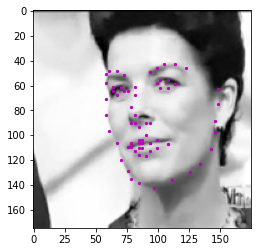

In [11]:
show_keypoints(X_test[19], (y_test[19].reshape(-1,2))*the_img_new_hight_and_width)

In [12]:
np.shape(X_train)

(13848, 175, 175)

In [15]:
# Define Sequential model with 3 layers
model = keras.Sequential([
        keras.Input(shape=(the_img_new_hight_and_width, the_img_new_hight_and_width,1)),

        layers.Conv2D(64, 3, strides=1, activation="relu"),
        layers.MaxPooling2D((3,3)),

        layers.Conv2D(256, 3, strides=1, activation="relu"),
        layers.MaxPooling2D((3,3)),

        layers.Conv2D(1024, 3, strides=1, activation="relu"),    
        layers.MaxPooling2D((3,3)),

        layers.Conv2D(4048, 3, strides=1, activation="relu"),    
        layers.MaxPooling2D((3,3)),

        

        layers.Flatten(),
        layers.Dropout(0.125),
        layers.Dense(2048, activation="relu", name="Dense_layer1"),
        layers.Dropout(0.125),
        layers.Dense(136, name="Output_layer"),
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 173, 173, 64)      640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 57, 57, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 55, 55, 256)       147712    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 256)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 1024)      2360320   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 1024)      

In [16]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True)

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.keras.losses.MeanAbsoluteError())

history = model.fit(X_train, y_train, epochs=1000, 
                    validation_data=(X_test, y_test),
                    batch_size=64,
                    callbacks=[callback])

Epoch 1/1000
217/217 [==============================] - 43s 193ms/step - loss: 0.1780 - val_loss: 0.0475
Epoch 2/1000
217/217 [==============================] - 41s 191ms/step - loss: 0.1315 - val_loss: 0.0413
Epoch 3/1000
217/217 [==============================] - 42s 192ms/step - loss: 0.1072 - val_loss: 0.0401
Epoch 4/1000
217/217 [==============================] - 42s 192ms/step - loss: 0.0924 - val_loss: 0.0358
Epoch 5/1000
217/217 [==============================] - 42s 193ms/step - loss: 0.0840 - val_loss: 0.0292
Epoch 6/1000
217/217 [==============================] - 42s 193ms/step - loss: 0.0761 - val_loss: 0.0292
Epoch 7/1000
217/217 [==============================] - 42s 193ms/step - loss: 0.0700 - val_loss: 0.0268
Epoch 8/1000
217/217 [==============================] - 42s 192ms/step - loss: 0.0642 - val_loss: 0.0297
Epoch 9/1000
217/217 [==============================] - 42s 193ms/step - loss: 0.0597 - val_loss: 0.0247
Epoch 10/1000
217/217 [==============================] 

Text(0, 0.5, 'loss')

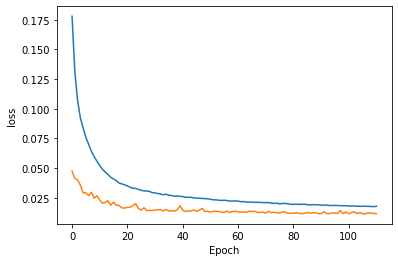

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
# plt.ylim([100, 200])

In [18]:
test_loss = model.evaluate(X_test,  y_test)

25/25 [==============================] - 2s 37ms/step - loss: 0.0115


In [19]:
def show_keypoints(image, key_pts, C='m'):
    """Show image with keypoints"""
    plt.imshow(image, cmap='gray')
    plt.scatter(key_pts[:, 0], key_pts[:, 1], s=20, marker='.', c=C)


1/1 [==============================] - 0s 322ms/step


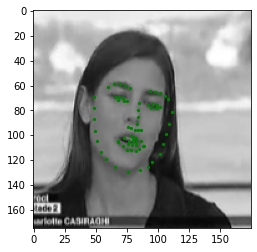

In [20]:
show_keypoints(X_test[105], (model.predict(np.array([X_test[105]]))*the_img_new_hight_and_width).reshape(-1,2), 'g')

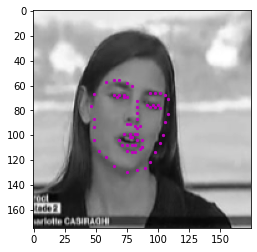

In [21]:
show_keypoints(X_test[105],(y_test[105]*the_img_new_hight_and_width).reshape(-1,2), 'm')

1/1 [==============================] - 0s 26ms/step


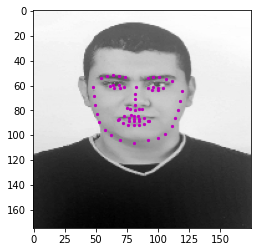

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

img = mpimg.imread('/content/finaal img.jpg')
img = cv2.resize(img,(the_img_new_hight_and_width, the_img_new_hight_and_width))
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap='gray')
 
keys = model.predict(np.array([img/255.0]))
keys = keys.reshape(-1,2)

show_keypoints(img, keys*the_img_new_hight_and_width)

In [28]:
model.save('/content/gdrive/MyDrive/facial-key-points-detection/best_model_3.h5')


In [ ]:
# reconstructed_model = keras.models.load_model('/content/gdrive/MyDrive/facial-key-points-detection/best_model_3.h5')